In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [218]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')


In [219]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [220]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [221]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 16, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Uti

In [222]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

In [223]:
missing_value_checker(test_edited)

[]
0


In [224]:
missing_value_checker(train_edited)

[]
0


In [225]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [226]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [227]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [228]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

In [229]:
test_edited.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,...,0,0,0,120,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,...,36,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,...,34,0,0,0,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,...,36,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,...,82,0,0,144,0,0,1,2010,9,5


In [230]:
#normalize the data between 0 and 1
for e in range(len(X.columns)): #iterate for each column
    max1 = X.iloc[:, e].max()
    max2 = test_edited.iloc[:, e].max()
    num = 0
    if max1 > max2:
        num = max1
    else:
        num = max2 
    
    if num < 10:
        X.iloc[:, e] /= 10
        test_edited.iloc[:, e] /= 10
    elif num < 100:
        X.iloc[:, e] /= 100
        test_edited.iloc[:, e] /= 100
    elif num < 1000:
        X.iloc[:, e] /= 1000
        test_edited.iloc[:, e] /= 1000
    elif num < 10000:
        X.iloc[:, e] /= 10000
        test_edited.iloc[:, e] /= 10000
    elif num < 100000:
        X.iloc[:, e] /= 100000
        test_edited.iloc[:, e] /= 100000
    elif num < 1000000:
        X.iloc[:, e] /= 1000000
        test_edited.iloc[:, e] /= 1000000


In [231]:
print(X) #print to check
print(test_edited) #print to check

          Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0     0.0001        0.06       0.4        0.065  0.008450     0.2       0.4   
1     0.0002        0.02       0.4        0.080  0.009600     0.2       0.4   
2     0.0003        0.06       0.4        0.068  0.011250     0.2       0.1   
3     0.0004        0.07       0.4        0.060  0.009550     0.2       0.1   
4     0.0005        0.06       0.4        0.084  0.014260     0.2       0.1   
...      ...         ...       ...          ...       ...     ...       ...   
1455  0.1456        0.06       0.4        0.062  0.007917     0.2       0.4   
1456  0.1457        0.02       0.4        0.085  0.013175     0.2       0.4   
1457  0.1458        0.07       0.4        0.066  0.009042     0.2       0.4   
1458  0.1459        0.02       0.4        0.068  0.009717     0.2       0.4   
1459  0.1460        0.02       0.4        0.075  0.009937     0.2       0.4   

      LandContour  Utilities  LotConfig  ...  OpenP

In [232]:
min1 = y.iloc[:].min()
y.iloc[:] -= min1
max1 = y.iloc[:].max()
y.iloc[:] /= max1 
print(y)

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
          ...   
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367
Name: SalePrice, Length: 1460, dtype: float64


/home/homa/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [233]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [234]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

In [235]:
import torch

In [236]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()     
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

In [237]:
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values)

In [238]:
input_size = X_train.size()[1] # number of features selected
hidden_size = 30 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification# without momentum parameter
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1) #with momentum parameter
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.2)



In [239]:
model.eval()
y_pred = model(X_val)
before_train = criterion(y_pred.squeeze(), y_val)
print('Test loss before training' , before_train.item())

Test loss before training 0.7021608352661133


In [240]:
model.train()
epochs = 25000
errors = []
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
    errors.append(loss.item())    
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.7015141844749451
Epoch 1: train loss: 0.6822131276130676
Epoch 2: train loss: 0.6616403460502625
Epoch 3: train loss: 0.6428647041320801
Epoch 4: train loss: 0.6257614493370056
Epoch 5: train loss: 0.6099721193313599
Epoch 6: train loss: 0.5954802632331848
Epoch 7: train loss: 0.5823997259140015
Epoch 8: train loss: 0.570745050907135
Epoch 9: train loss: 0.5604522824287415
Epoch 10: train loss: 0.5514528155326843
Epoch 11: train loss: 0.543665885925293
Epoch 12: train loss: 0.5370006561279297
Epoch 13: train loss: 0.5313535928726196
Epoch 14: train loss: 0.5266174077987671
Epoch 15: train loss: 0.522682785987854
Epoch 16: train loss: 0.5194462537765503
Epoch 17: train loss: 0.5168078541755676
Epoch 18: train loss: 0.5146760940551758
Epoch 19: train loss: 0.5129651427268982
Epoch 20: train loss: 0.5115999579429626
Epoch 21: train loss: 0.5105170607566833
Epoch 22: train loss: 0.5096621513366699
Epoch 23: train loss: 0.5089884996414185
Epoch 24: train loss: 0.50845

In [241]:
model.eval()
y_pred = model(X_val)
after_train = criterion(y_pred.squeeze(), y_val)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.4653743505477905


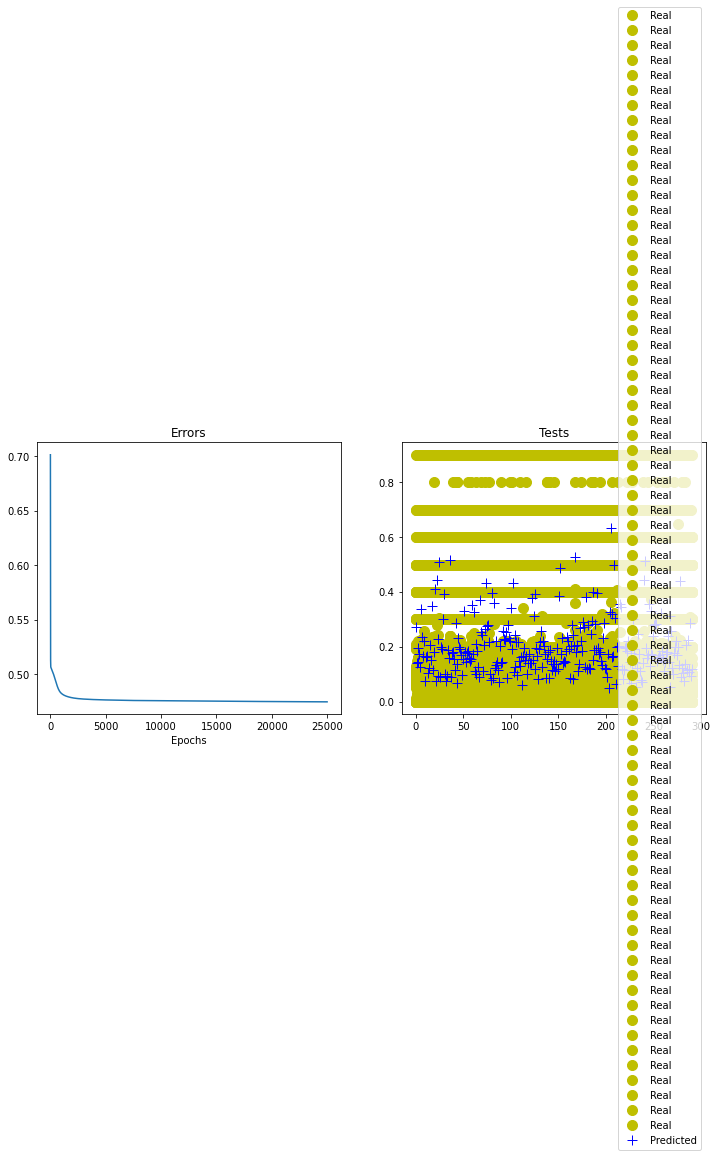

In [242]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)    
    plt.figure(figsize=(12, 5))   
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')    
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(X_val.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [243]:
model.eval()
test_edited = torch.FloatTensor(np.array(test_edited))
y_pred = model(test_edited)

In [244]:
print(y_pred)

tensor([[0.1176],
        [0.1748],
        [0.2107],
        ...,
        [0.1620],
        [0.1043],
        [0.2833]], grad_fn=<SigmoidBackward0>)
